In [13]:
# use kernel py3-6
#import goatools
#from goatools import obo_parser
import re
import json
import numpy as np
import pandas as pd
#from goatools.go_enrichment import GOEnrichmentStudy
import matplotlib.pyplot as plt
import os

In [14]:
with open("/home/t44p/PW_rawdata/results/full_lasso/gcms/citric_acid_273_375_rt9_72_nXcv.json", 'r') as file:
    citric_acid_273_375_rt9_72_nXcv2 = json.load(file)

In [15]:
all2_means = citric_acid_273_375_rt9_72_nXcv2['mean_scores']

In [16]:
citric_acid_273_375_rt9_72_nXcv2['scores'].keys()

dict_keys(['42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52'])

In [17]:
"""all_fold_scores = []
for item, values in citric_acid_273_375_rt9_72_nXcv['scores'].items():
    print(values['fold_scores'])
    all_fold_scores.extend(values['fold_scores'])
print(all_fold_scores)"""

"all_fold_scores = []\nfor item, values in citric_acid_273_375_rt9_72_nXcv['scores'].items():\n    print(values['fold_scores'])\n    all_fold_scores.extend(values['fold_scores'])\nprint(all_fold_scores)"

In [32]:

path_gc = "/home/t44p/PW_rawdata/results/full_lasso/gcms/"
path_lc ="/home/t44p/PW_rawdata/results/full_lasso/lcms/"
lasso_results = {}


# Iterate over each file in the directory
for p in [path_gc, path_lc]:

    for file in os.listdir(p):
        if file.endswith(".json") and not(file.startswith('gcms_dict_nXcv') or file.startswith('lcms_dict_nXcv')):
            file_path = os.path.join(p, file)
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
            
            # Extract mean scores and fold scores
            print(file)
            
                
            all_means = data['mean_scores']
            all_fold_scores = []
            for item, values in data['scores'].items():
                all_fold_scores.extend(values['fold_scores'])

            # Use file name without extension as the key
            file_name = os.path.splitext(file)[0]
            lasso_results[file_name] = {
                'all_mean_scores': all_means,
                'mean_10x': np.mean(all_means),
                'all_fold_scores': all_fold_scores
            }



Cellobiose_361_204_rt14_40_nXcv.json
tyrosine_218_280_rt10_78_nXcv.json
threonic_acid_292_220_rt7_49_nXcv.json
isoleucin_158_233_rt_5_21_nXcv.json
asparagine_116_188_rt9_00_nXcv.json
adenine_264_279_rt11_12_nXcv.json
glycerol_117_205_rt4_75_nXcv.json
raffinose_437_451_rt16_91_nXcv.json
adenosine_5_monophosphate_169__nXcv.json
ornithine_142_174_rt9_34_nXcv.json
glucose_160_rt9_81_nXcv.json
inositol_myo_305_265_rt10_71_nXcv.json
phosphoric_acid_314_299_rt_5_4_nXcv.json
sucrose_437_361_rt13_77_nXcv.json
hexose_307_217_rt9_58_nXcv.json
alanine_3_cyano_141_100_rt6_78_nXcv.json
threonine_219_291_rt6_01_nXcv.json
tryptophan_202_291_rt12_94_nXcv.json
citric_acid_273_375_rt9_72_nXcv.json
alanine_116_218_rt3_38_nXcv.json
glucose_1_phosphate_217_rt9_16_nXcv.json
leucine_158_232_rt4_97_nXcv.json
trehalose_alpha_alpha_191_169__nXcv.json
quinic_acid_255_345_rt9_45_nXcv.json
Oxalic_acid_219_147_3_94_nXcv.json
valine_144_218_rt4_42_nXcv.json
dopamine_174_426_rt11_11_nXcv.json
galactinol_204_191_rt15_3

In [19]:
len(lasso_results.keys())

243

## Distribution of foldscore variance

shows how many models have e.g. 0.4 to 0.45

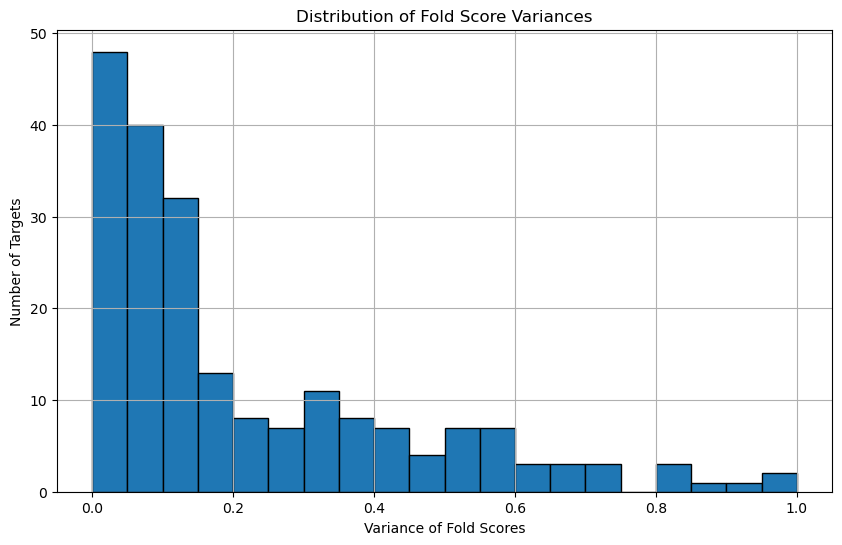

In [20]:
variances = []
variances = [np.var(target_data['all_fold_scores']) for target_data in lasso_results.values()]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(variances, bins=np.arange(0, 1.05, 0.05), edgecolor='black')
plt.title('Distribution of Fold Score Variances')
plt.xlabel('Variance of Fold Scores')
plt.ylabel('Number of Targets')
plt.grid(True)
plt.show()


#### variance plot now we know that there are variances bigger than 100 & 6000

use auto binning 

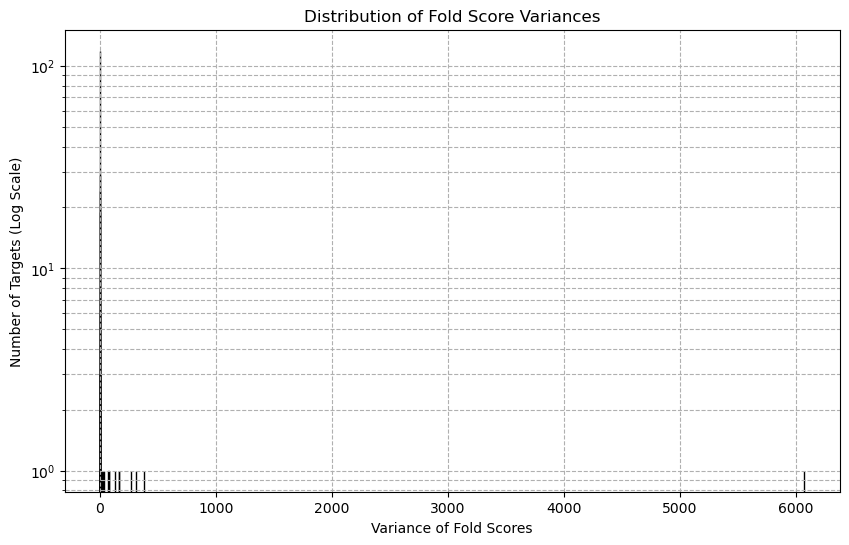

In [44]:
# Calculate the variances of fold scores for each target
variances = [np.var(target_data['all_fold_scores']) for target_data in lasso_results.values()]

# Since we have variances that are very high, we will use a logarithmic scale on the y-axis.
# We also use a wider range of bins to capture the high variance values.

# Find the maximum variance to define the end of the bin range
max_variance = max(variances)

# Define the number of bins or use 'auto' for automatic binning
num_bins = 'auto'  # You can also specify an integer for a fixed number of bins

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(variances, bins=num_bins, edgecolor='black', log=True)  # Note the log=True parameter
plt.title('Distribution of Fold Score Variances')
plt.xlabel('Variance of Fold Scores')
plt.ylabel('Number of Targets (Log Scale)')
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks
plt.show()


In [25]:
print(max(variances))
for item, target_data in lasso_results.items():
    np.var(target_data['all_fold_scores'])
    if np.var(target_data['all_fold_scores']) > 2:
        print(f"{item}: \t {np.var(target_data['all_fold_scores'])}  \t  fold_scores: {target_data['all_fold_scores']} ")# {max(target_data['all_fold_scores'])}
        


6074.423466047853
dehydroascorbic_acid_316_173_r_nXcv: 	 4.689657613703287  	  fold_scores: [-0.193664935448145, -1.1659423491168326, -0.3187026806342872, -0.08210667079494738, -0.7249946481914753, -0.511004794632012, -2.352387790530598, -1.8677075739179148, -0.4619079698711741, -1.145853332110267, -0.3628665777549187, -0.08768060308335923, -12.566253440092236, -0.3414299499314777, -0.1873928853970761, -0.39630366018809426, 0.14148065119001463, -0.1293262989516757, -0.09197292817297087, -0.5308904214181605, -0.20396463963684885, -0.4046335992788639, -1.5628113290526553, -0.7782736131020105, -0.4137981034972582, -0.9192351028610768, -0.16904608008296362, -1.763611608341563, -0.5014643509139498, -0.34298909711120573, -3.2687968602902018, -0.4269508281253134, -0.053908332481042986] 
ethanolamine_174_rt4_63_nXcv: 	 2.245941315511194  	  fold_scores: [-0.4094841677669536, -0.5515849885023572, -0.373711299460878, -3.0601040731630675, 0.03913714153598791, -0.1539536689904475, 0.04188307591533

In [33]:
[lasso_results[target_data]['mean_10x'] for target_data in lasso_results.keys()]

[0.3508442710335274,
 0.08349998679351965,
 0.7354872382737536,
 0.13551377837277065,
 -0.09676782444151706,
 -0.7169357476263346,
 -0.00032153781807132335,
 0.7726347578255037,
 0.41338952596367784,
 -0.23094321900074988,
 0.4038772690045627,
 0.06887431979605976,
 -0.13680935177717643,
 0.3378736727579361,
 0.26053976995137135,
 0.20335379803903245,
 0.045614930069390776,
 -0.1441353958429078,
 0.299572179518963,
 0.5041546339774128,
 0.4737243060710512,
 0.422776767341394,
 -0.009724005601519918,
 0.07257203083003823,
 -1.1336052618668317,
 0.4412489494712444,
 0.16292473867268462,
 0.12586901634487166,
 -0.139100233922365,
 -0.2201936618413959,
 -1.0359512849643198,
 -0.31322634873233235,
 0.20475378127384927,
 -0.13729699116232194,
 -0.12610079899731255,
 -0.19094873059246115,
 0.3409811806518983,
 -0.766929712979972,
 -0.7530792166558505,
 0.7159047010377437,
 0.14772441244721285,
 0.7500806239379816,
 -0.07042852246754862,
 -0.1465794557335932,
 -0.1437560695849751,
 -0.33375823

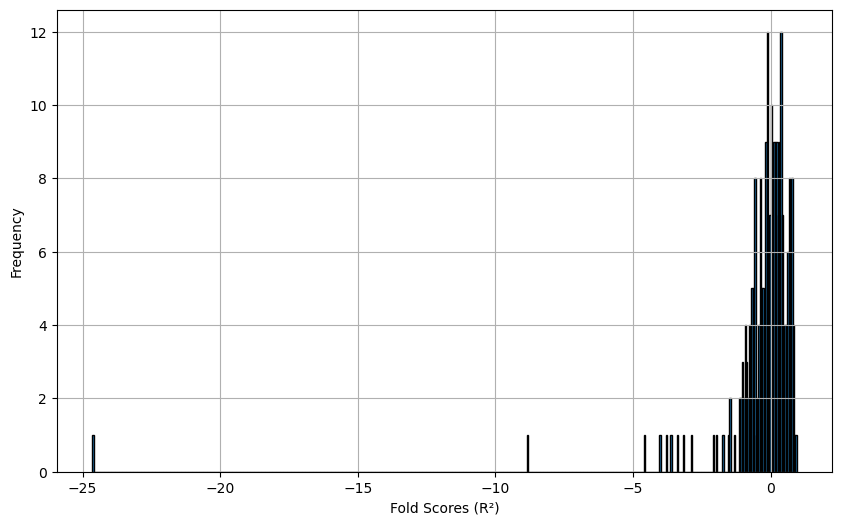

In [38]:

# Flatten all fold scores into a single list

#all_fold_scores = [score for target_data in lasso_results.values() for score in target_data['all_mean_scores']]
all_mean_scores = [lasso_results[target_data]['mean_10x'] for target_data in lasso_results.keys()]

# Find the minimum and maximum fold scores
min_score = min(all_mean_scores)
max_score = max(all_mean_scores)

# Round these to the nearest appropriate bin edge
bin_start = np.floor(min_score / 0.05) * 0.05  # Adjust 0.05 if you prefer a different bin width
bin_end = np.ceil(max_score / 0.05) * 0.05

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_mean_scores, bins=np.arange(bin_start, bin_end + 0.05, 0.05), edgecolor='black')
#plt.title('Distribution of Fold Scores')
plt.xlabel('Fold Scores (R²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.show()

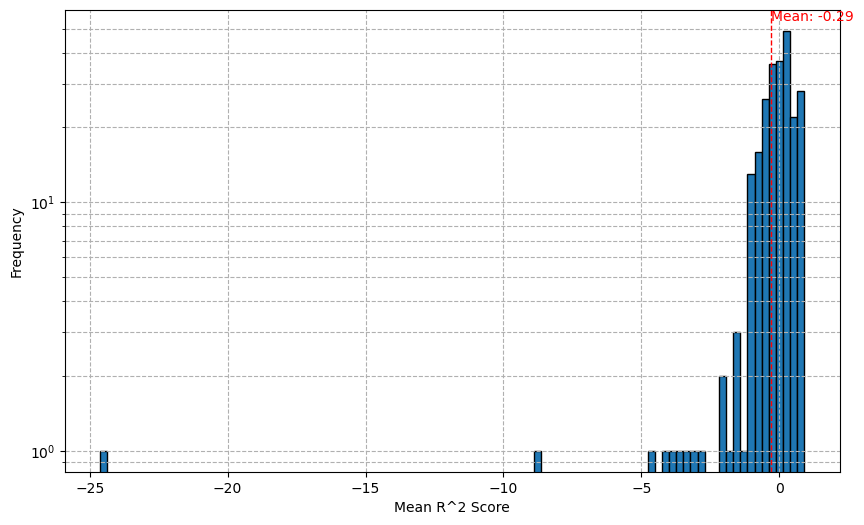

In [41]:
plt.figure(figsize=(10, 6))

# Logarithmic scale for x-axis
all_mean_scores = [lasso_results[target_data]['mean_10x'] for target_data in lasso_results.keys()]

bin_edges = np.histogram_bin_edges(all_mean_scores, bins='auto')
plt.hist(all_mean_scores, bins=bin_edges, edgecolor='black', log=True)

plt.xlabel('Mean R^2 Score')
plt.ylabel('Frequency')
#plt.title('Distribution of Mean \( R^2 \) Scores Across Targets')
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks

# Annotation for mean or median
mean_score = np.mean(all_mean_scores)
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_score, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_score:.2f}', color = 'red')

plt.show()


In [43]:
np.mean(all_mean_scores)
#bin_edges

-0.2875103815164638

BINNING

Choosing bin sizes for a histogram representing coefficient of determination (\( R^2 \)) values from machine learning results depends on several factors, including the range of your data, the level of detail you want to capture, and the interpretability of the results. The coefficient of determination typically ranges from 0 to 1, where 1 indicates perfect prediction and 0 indicates that the model explains none of the variability of the response data around its mean.

For your case, using categorical bins like "good performing" (0.9999 - 0.4), "mediocre" (0.4 - 0.1), and "bad" (0 - -∞) could be a good approach if you want to emphasize the performance categories of your models. However, this approach has some considerations:

1. **Interpretability:** Categorical bins like "good", "mediocre", and "bad" provide an intuitive understanding of model performance. This can be useful for non-technical stakeholders or for a high-level overview.

2. **Detail Loss:** By categorizing into broad groups, you might lose some detail about the distribution within each category. For instance, a model with an \( R^2 \) of 0.399 is quite different from one with 0.101, yet both would be categorized as "mediocre".

3. **Negative Values:** The coefficient of determination usually ranges from 0 to 1. Negative values of \( R^2 \) are possible but indicate that the model is worse than a simple mean model. If you have negative values, it might be important to investigate why your models are performing so poorly.

4. **Custom Bin Sizes:** Alternatively, you could use more granular bins based on the actual distribution of your data. For example, bins of width 0.1 or 0.05 might provide a more detailed view of the distribution of your \( R^2 \) values.

Based on your preferences and the specific nature of your data, you can choose either the categorical approach or a more granular binning strategy. If you provide the data, I can create a histogram that aligns with your chosen approach.